In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

In [4]:
n_classes = 2
plot_step = 0.015
plot_colors = 'by'

In [5]:
# load data
train = pd.read_csv('hw5-boosting/data/banana_train.csv',header=None,names=['label','feature_1','feature_2'])
train['label'] = train['label'].apply(lambda x: 0 if x==-1 else 1)
X = train[['feature_1','feature_2']].as_matrix()
y = train.label.values

In [6]:
print X

[[ 0.93078  0.78345]
 [ 1.42    -0.69697]
 [-0.38296 -1.0432 ]
 ..., 
 [-0.90053 -1.6831 ]
 [-0.28544 -1.1008 ]
 [-0.83844  0.35619]]


In [7]:
print y

[0 1 0 ..., 0 0 1]


In [8]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step)) 

In [15]:
# try different values for the depth of decision tree
for depth_id, depth in enumerate([2, 4, 6, 8, 10, 12]):
    # train
    clf = DecisionTreeClassifier(max_depth=depth).fit(X, y)
    plt.subplot(2, 3, depth_id + 1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.xlabel('feature 1')
    plt.ylabel('feature 2')
    plt.axis("tight")
    
    # plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=i, cmap=plt.cm.Paired, s=0.5)
    plt.axis("tight")

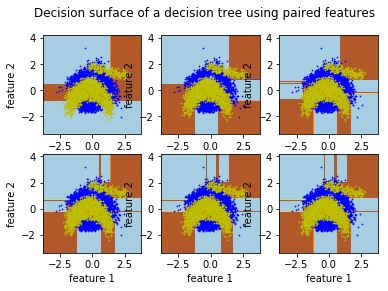

In [16]:
plt.suptitle("Decision surface of a decision tree using paired features")
plt.show()

The plots can show as the depth of decision tree increases (keep other parameters as default values), the model becomes more complex.

In [17]:
# load test set
test = pd.read_csv('hw5-boosting/data/banana_test.csv',header=None,names=['label','feature_1','feature_2'])
test['label'] = test['label'].apply(lambda x: 0 if x==-1 else 1)
X_test = test[['feature_1','feature_2']].as_matrix()
y_test = test.label.values

In [22]:
# plot the train and test errors as a function of depth
train_errors = []
test_errors = []
for depth in range(2, 15):
    # train
    clf = DecisionTreeClassifier(max_depth=depth).fit(X, y)
    clf.score(X,y)
    train_errors.append(1-clf.score(X,y))
    test_errors.append(1-clf.score(X_test, y_test))

In [23]:
test_errors

[0.27166666666666661,
 0.19555555555555559,
 0.15888888888888886,
 0.13777777777777778,
 0.12333333333333329,
 0.12388888888888894,
 0.12611111111111106,
 0.13277777777777777,
 0.13611111111111107,
 0.13,
 0.13277777777777777,
 0.13944444444444448,
 0.13611111111111107]

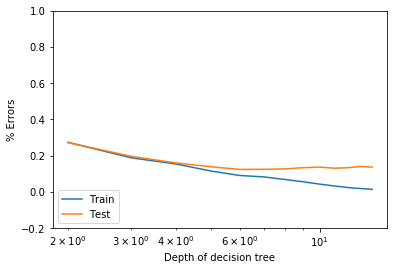

In [27]:
depths = [i for i in range(2,15)]
plt.semilogx(depths, train_errors, label='Train')
plt.semilogx(depths, test_errors, label='Test')

plt.legend(loc='lower left')
plt.ylim([-0.2, 1])
plt.xlabel('Depth of decision tree')
plt.ylabel('% Errors')
plt.show()

We can see that when the depth of the decision tree is larger than 4, there is overfitting for the train set.